In [ ]:
from google.colab.patches import cv2_imshow
import numpy as np
import cv2
import matplotlib.pyplot as plt

from skimage.data import camera    
# You can use any other input image as well
from skimage.filters import roberts, sobel, scharr, prewitt

image = camera()


In [ ]:
#Original Image
img_orig = image
img_orig


array([[156, 157, 160, ..., 152, 152, 152],
       [156, 157, 159, ..., 152, 152, 152],
       [158, 157, 156, ..., 152, 152, 152],
       ...,
       [121, 123, 126, ..., 121, 113, 111],
       [121, 123, 126, ..., 121, 113, 111],
       [121, 123, 126, ..., 121, 113, 111]], dtype=uint8)

###roberts, sobel, scharr, prewitt

In [ ]:
img_robert = roberts(image)
img_sobel = sobel(image)
img_scharr = scharr(image)
img_prewitt = prewitt(image)

Roberts

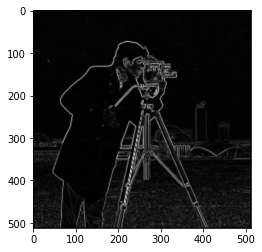

In [ ]:
plt.imshow(img_robert,cmap = 'gray')


sobel

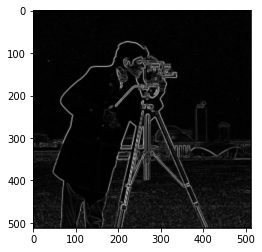

In [ ]:
plt.imshow(img_sobel, cmap = 'gray')

scharr

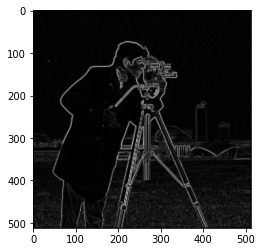

In [ ]:
plt.imshow(img_scharr, cmap = 'gray')

prewitt

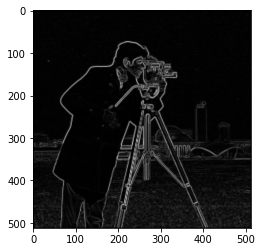

In [ ]:
plt.imshow(img_prewitt, cmap = 'gray')

In [ ]:
image = cv2.copyMakeBorder( image, 1, 1, 1, 1,cv2.BORDER_CONSTANT)
image

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0, 156, 157, ..., 152, 152,   0],
       [  0, 156, 157, ..., 152, 152,   0],
       ...,
       [  0, 121, 123, ..., 113, 111,   0],
       [  0, 121, 123, ..., 113, 111,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

##Question 2

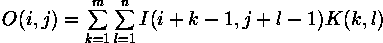

In [ ]:
from scipy import misc, signal
from scipy import ndimage, misc
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu

# im = rgb2gray(imread('Image path')).astype(float)
# print(np.max(im))
# print(im.shape)
ker = [[0,-1,0],
       [-1,4,-1],
       [0,-1,0]]
# Define Laplacian mask/kernel
laplace_kernel = np.array(ker)
M = image.shape[0]
N = image.shape[1]
m = laplace_kernel.shape[0]
n = laplace_kernel.shape[1]
def lap(image,laplace_kernel,M,N,m,n):
  new_image=np.zeros((image.shape[0]-1,image.shape[1]-1))
  for i in range(M-m+1):
    for j in range(N-n+1):
      temp=0
      for k in range(0,m):
        for l in range(0,n):
          temp += image[i+k-1,j+l-1]*laplace_kernel[k,l]
      new_image[i,j] -= temp
  return new_image
image = camera()
image = cv2.copyMakeBorder( image, 1, 1, 1, 1,cv2.BORDER_CONSTANT)
lap_img = lap(image,laplace_kernel,M,N,m,n)

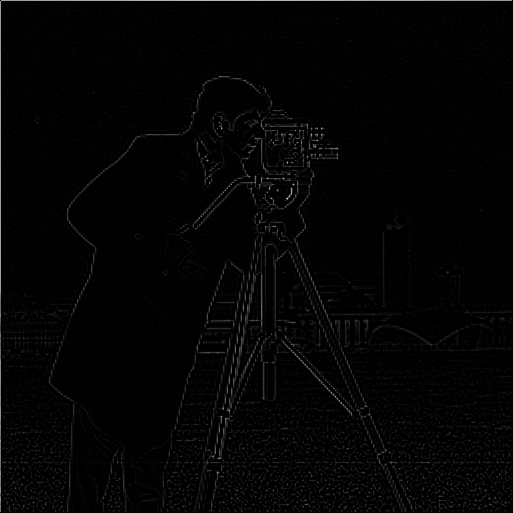

In [ ]:
cv2_imshow(lap_img)

###b)	Apply Gaussian followed by Laplace to study LoG filter. Does it show an improvement? Justify

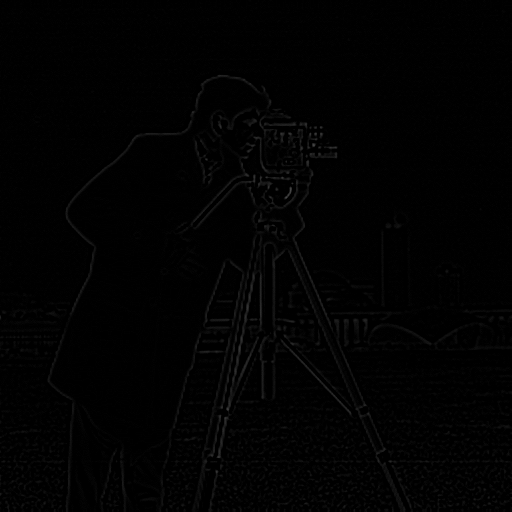

In [ ]:
from scipy.ndimage import gaussian_filter
image = camera()
gaussian = gaussian_filter(image,sigma=1)
log = cv2.Laplacian(gaussian,cv2.CV_64F)

cv2_imshow(log)

##3.	Combining Spatial Enhancement Methods
Follow these steps:


*   a)	Read an input image (grayscale)
*   b) Laplacian of a)
*   c)	Add a) and b). By this, sharpened image will be obtained


*   d)	Sobel of a)
*   e)	Sobel image smoothed with a 5*5 averaging filter

*   f)	Mask image formed by the product of (c) and (e).

g)	Sharpened image obtained by the sum of (a) and (f).





In [ ]:
new_img = camera()
lap = cv2.Laplacian(new_img, cv2.CV_64F)
add = new_img+lap
sob_a = sobel(new_img)
sob_avg = cv2.blur(sob_a,(5,5))
f = add*sob_avg
g = new_img+f

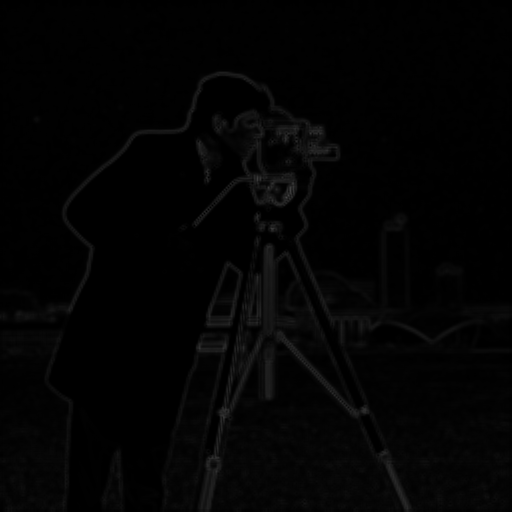

In [ ]:
cv2_imshow(f)

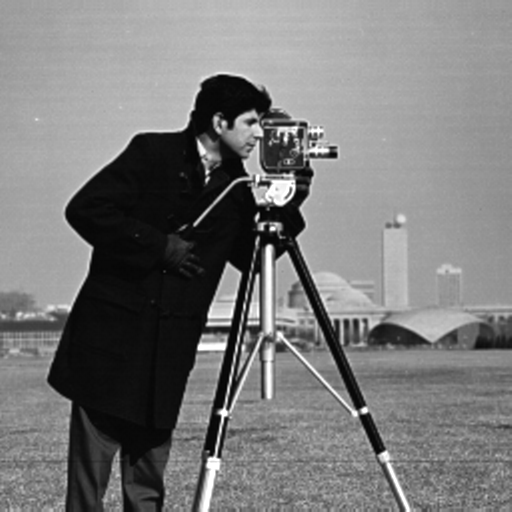

In [ ]:
cv2_imshow(g)